# Regression with an ANN on housing prices

Data on https://www.kaggle.com/harlfoxem/housesalesprediction


#### Features
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os

In [4]:
pwd = os.getcwd()
df = pd.read_csv(pwd + '/kc_house_data.csv')

## EDA

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


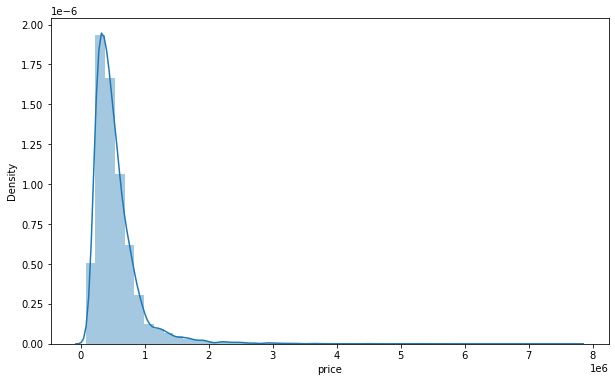

In [8]:
#distribution of tatget variable
plt.figure(figsize=(10,6))
sns.distplot(df['price'])
#question based on distribution: cutoff at 3 million?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


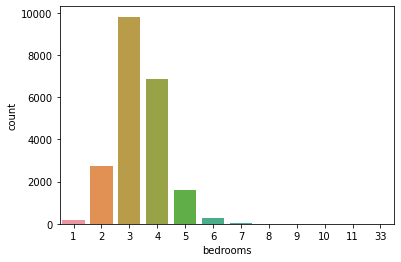

In [10]:
#check for outliers
sns.countplot(df['bedrooms'])
#outlier with 33 bedrooms

In [11]:
#look for label with feature that has a high correlation
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

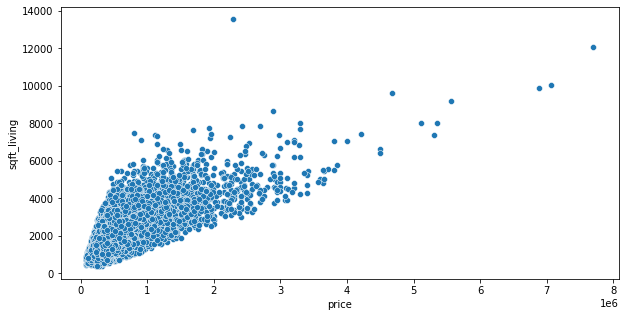

In [12]:
# explore highly correlated features with label
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='price', y='sqft_living')

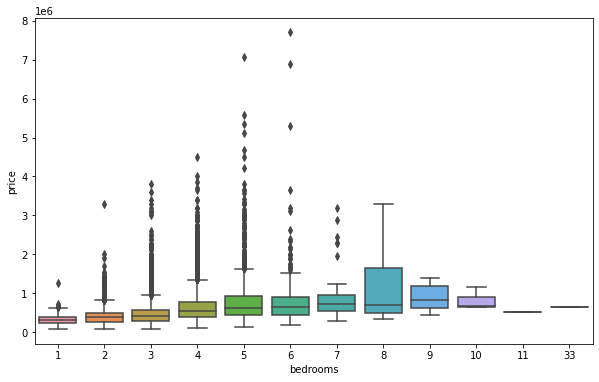

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=df)
#we see variations in bedrooms between 3 and 7 -> majority of houses have this kind of bedrooms, explains variety in prices

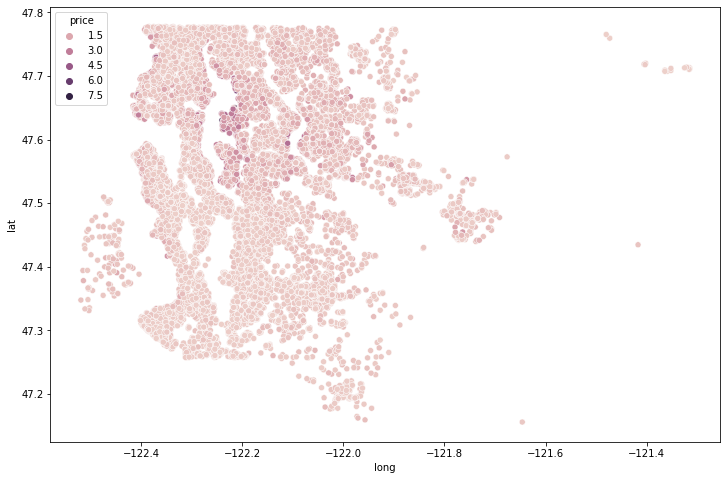

In [16]:
#latitude, longitude
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',hue='price',data=df)

In [17]:
#drop outliers to make effects of plotting more visible
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [ ]:
#sample out top 1%
len(df)*0.01

In [19]:
bottom_99_percent = df.sort_values('price',ascending=False).iloc[216:]
#grab everything after top 1% to have clearer color distribution on the scatterplot

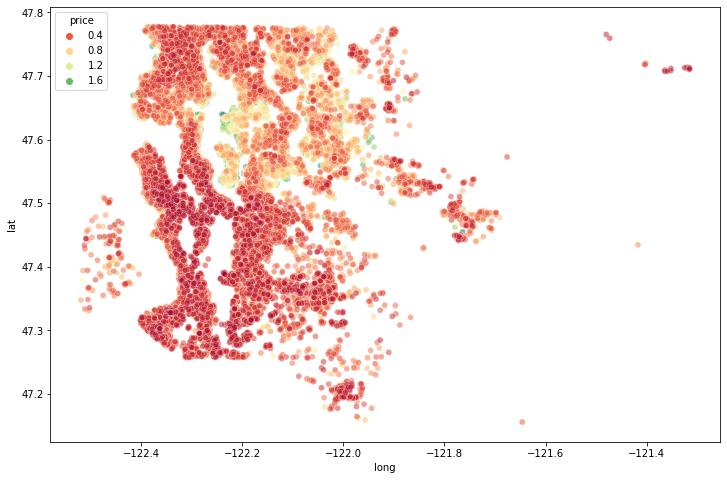

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',hue='price',data=bottom_99_percent,alpha=0.5,palette='RdYlGn')
#waterfront seems to be more expensive

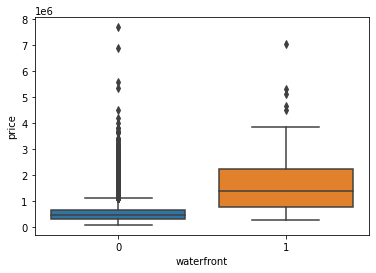

In [21]:
sns.boxplot(x='waterfront',y='price',data=df)
#waterfront more expensive

In [22]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
#drop columns
df = df.drop('id',axis=1)

In [24]:
#convert date
df['date'] = pd.to_datetime(df['date'])

In [25]:
#extract datetime features
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

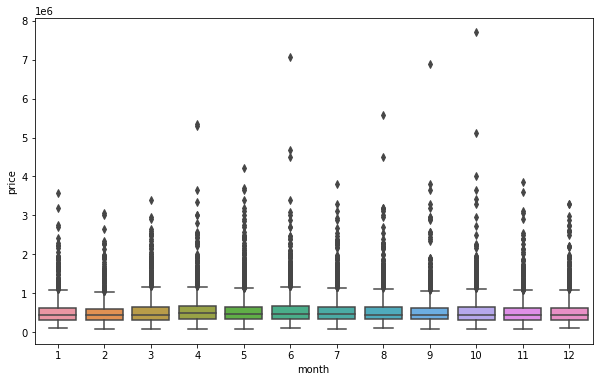

In [27]:
#explore relationship between price and time features
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

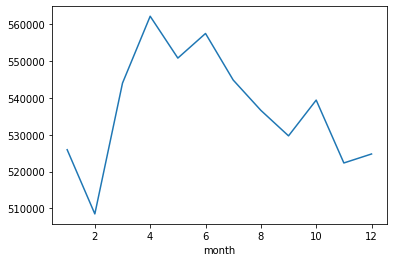

In [28]:
df.groupby('month').mean()['price'].plot()
#not really a huge price range

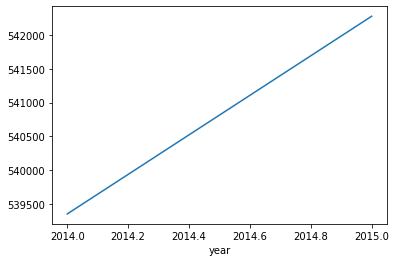

In [29]:
df.groupby('year').mean()['price'].plot()

In [30]:
df = df.drop('date',axis=1)

In [31]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [32]:
df.head()
#most features make sense or are already dummy encoded
#but zipcode not good, model will think it's a continuous feature

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [33]:
df = df.drop('zipcode',axis=1)

In [34]:
#year renovated feature
df['yr_renovated'].value_counts()
#most houses are not renovated
#feature engineer feature

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [35]:
def renovated(df):
    '''
    creates new label 'renovated' taking into account year of renovation
    '''
    df.loc[(df['yr_renovated'] == 0) | (df['yr_renovated'] <= 2004), 'renovated'] = 0
    df.loc[(df['yr_renovated'] > 2004), 'renovated'] = 1
renovated(df)

In [36]:
df = df.drop('yr_renovated',axis=1)

In [37]:
#check out sqft basement feature
df['sqft_basement'].value_counts()
#continuous value, leave 0 as bottom marker

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Preprocess Data

In [38]:
#seperate feature from label
#returns numpy array, tensorflow can't work well with df or series
X = df.drop('price',axis=1).values
y = df['price'].values

In [39]:
from sklearn.model_selection import train_test_split
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
X_train.shape
#we have 19 features, so we take 19 neurons

(15117, 19)

In [43]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

#final layer will output the predicted price
model.add(Dense(1))


model.compile(optimizer='adam',loss='mse')

In [44]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)
#pass in validation data to keep track on model's performance
#pass in numpy array
#feed in data in batches because it's a large dataset

Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 430241415168.0000 - val_loss: 418923118592.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 429337706496.0000 - val_loss: 415839191040.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 417379713024.0000 - val_loss: 388534599680.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 356503158784.0000 - val_loss: 286381211648.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 217809584128.0000 - val_loss: 138104700928.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 113916493824.0000 - val_loss: 96872611840.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 99154092032.0000 - val_loss: 94955053056.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 97395802112.0000 - val_loss: 93470785536.0000
Epoch 9/400
119/119 [

In [52]:
#explore model history
#compare loss on training with loss on validation
losses = pd.DataFrame(model.history.history)

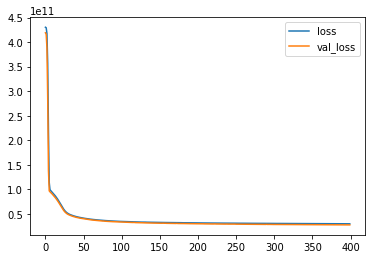

In [53]:
losses.plot()
#no overfitting!

### Evaluation

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [55]:
predictions = model.predict(X_test)
predictions

array([[400970.2 ],
       [602292.6 ],
       [583956.56],
       ...,
       [386770.28],
       [572299.25],
       [691545.06]], dtype=float32)

In [57]:
#take list of predictions and compare them to correct values
np.sqrt(mean_squared_error(y_test,predictions))

166133.16621989853

In [58]:
mean_absolute_error(y_test,predictions)
#we're off by ca. 100.000 dollars

103006.2926516686

In [59]:
df['price'].describe()
#if we look at the mean value, we see that we're off by 20%, not so good

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [60]:
explained_variance_score(y_test,predictions)
#we explain almost 80% of the variance in the data

0.7921867357302794

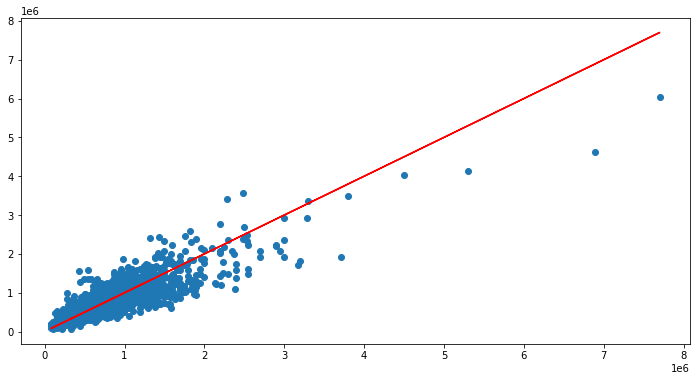

In [63]:
#plot out predictions
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
#perfect prediction line
plt.plot(y_test,y_test,'r')

We see that the highly priced outliers make our model worse. The model isn't good at predicting the really expensive houses, but good at predicting houses up to 2 million dollars.

It would make sense to drop outliers and only train model on bottom 99% of the houses up to 3 million.

### Predictions on real data

In [66]:
single_house = df.drop('price',axis=1).iloc[0]

In [72]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        4.75112e+01, -1.22257e+02,  1.34000e+03,  5.65000e+03,
        2.01400e+03,  1.00000e+01,  0.00000e+00])

In [74]:
#scale data
single_house = scaler.transform(single_house.values.reshape(-1,19))
#-1: keep the old dimensions along the axis

In [75]:
model.predict(single_house)

array([[287842.5]], dtype=float32)

In [76]:
df.head(1)
#we're more or less in the price range

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,year,month,renovated
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650,2014,10,0.0
